<a href="https://colab.research.google.com/github/mosdrsv/Dataset/blob/main/copy_of_graduation_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 1 to 4240
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender (Male)           4240 non-null   object
 1   Age                     4240 non-null   object
 2   Education               4135 non-null   object
 3   Current Smoker          4240 non-null   object
 4   Cigs/Day                4211 non-null   object
 5   BP Meds                 4187 non-null   object
 6   Prevalent Stroke        4240 non-null   object
 7   Prevalent Hypertension  4240 non-null   object
 8   Diabetes                4240 non-null   object
 9   Total Cholesterol       4190 non-null   object
 10  Systolic BP             4240 non-null   object
 11  Diastolic BP            4240 non-null   object
 12  BMI                     4221 

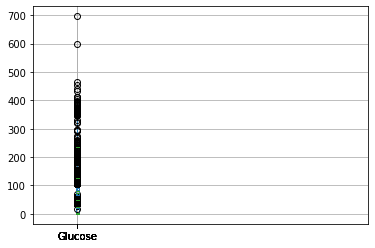

The score of Test Data Set for Linear Regression is 0.8596698113207547
The score of Test Data Set for Decision Tree is 0.8514150943396226
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.71131
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.28869
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000


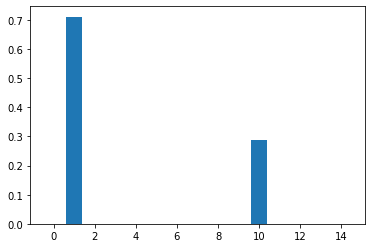

The score of Test Data Set for Random forest is 0.8573113207547169


NameError: ignored

In [ ]:
from pandas.core.common import random_state
import numpy as np
import pandas as pd
import matplotlib as plt
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
clear_output() 
import statsmodels.formula.api as sm
from google.colab import drive
drive.mount("/content/gdrive")
df = pd.read_csv("/content/gdrive/My Drive/framingham.csv", na_values='?',header=None)
df.columns= ['Gender (Male)','Age','Education','Current Smoker','Cigs/Day','BP Meds','Prevalent Stroke','Prevalent Hypertension','Diabetes', 'Total Cholesterol', 'Systolic BP',
            'Diastolic BP', 'BMI', 'Heart Rate', 'Glucose','Ten Year CHD']
df.drop(df.index[0], inplace = True)           
df.isnull().sum()
df.shape
df.info()
df = df.apply(pd.to_numeric, errors='coerce')
df.info()
df.describe()
count=df.isnull().values.sum()
print(count)
print(round((count/len(df.index))*100),'%')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean",
                        fill_value=None, verbose=0, copy=True)
imputer = imputer.fit(df)
df = imputer.transform(df)
imdf=pd.DataFrame(df)
imdf.columns= ['Gender (Male)','Age','Education','Current Smoker','Cigs/Day','BP Meds','Prevalent Stroke','Prevalent Hypertension','Diabetes', 'Total Cholesterol', 'Systolic BP',
            'Diastolic BP', 'BMI', 'Heart Rate', 'Glucose','Ten Year CHD']
imdf.isnull().sum()
imdf.mean()
imdf.boxplot(column='Cigs/Day')
imdf.loc[imdf['Cigs/Day'] > 59, 'Cigs/Day'] = 9.02
imdf.boxplot(column='Education')
imdf.boxplot(column='Age')
imdf.boxplot(column='Total Cholesterol')
imdf.loc[imdf['Total Cholesterol'] > 480, 'Total Cholesterol'] = 237
imdf.boxplot(column='Systolic BP')
imdf.loc[imdf['Systolic BP'] > 270, 'Systolic BP'] =132
imdf.boxplot(column='Diastolic BP')
imdf.boxplot(column='BMI')
imdf.loc[imdf['BMI'] > 49, 'BMI'] = 26
imdf.boxplot(column='Heart Rate')
imdf.boxplot(column='Glucose')




#imdf = imdf.drop("Education", axis=1)



print(imdf)
X=imdf.drop(['Ten Year CHD'], axis = 1)
y= imdf['Ten Year CHD']
                                         #data standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)
#print(pd.DataFrame(X))

#              "training the modle"
#from sklearn.svm import SVC
#classifer=SVC(kernel='rbf',random_state=0)
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)
X = imdf.drop(['Ten Year CHD'], axis = 1)
y = imdf['Ten Year CHD']
from sklearn.linear_model import LogisticRegression
classifer=LogisticRegression(random_state=0)
classifer.fit(X_train,y_train)
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# summarize feature importance
importance = classifer.coef_[0]
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



#                 "modle evalution"
#     "train accurancy"
from sklearn.metrics import accuracy_score
y_trainpred=classifer.predict(X_train)
scoretrain=accuracy_score(y_trainpred,y_train)
#print(scoretrain)
#          "test accurancy"
ypred=classifer.predict(X_test)
ypred=classifer.predict(X_test)
scoretest =accuracy_score(y_test,ypred)
print('The score of Test Data Set for Linear Regression is',scoretest)

#          "Decision tree"
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifer = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
classifer.fit(X_train, y_train)

#        "train accurancy"
from sklearn.metrics import accuracy_score
y_trainpred=classifer.predict(X_train)
scoretrain=accuracy_score(y_trainpred,y_train)
#print(scoretrain)

#          "test accurancy"
ypred=classifer.predict(X_test)
ypred=classifer.predict(X_test)
scoretest =accuracy_score(y_test,ypred)
print('The score of Test Data Set for Decision Tree is',scoretest)
# get importance
importance = classifer.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
####### "Random forest algorithm "

from sklearn.ensemble import RandomForestClassifier
classifer=RandomForestClassifier(n_estimators=100)
classifer.fit(X_train,y_train)

#        "train accurancy"
y_trainpred=classifer.predict(X_train)
scoretrain=accuracy_score(y_trainpred,y_train)
#print(scoretrain)

#          "test accurancy"
ypred=classifer.predict(X_test)
ypred=classifer.predict(X_test)
scoretest =accuracy_score(y_test,ypred)
print('The score of Test Data Set for Random forest is',scoretest)


   












